### DTSA 5510 Unsupervised Learning Final Project
# Cardio Good Fitness

#Project Overview
This project will aim to group the customers of Cardio Good Fitness into clusters. The dataset is from Kaggle, CardioGoodFitness https://www.kaggle.com/datasets/saurav9786/cardiogoodfitness. The data are collected based on individuals who purchased a treadmill at a CardioGoodFitness retail store.  It's an unsupervised learning problem because there are no labels in the dataset. In this project, I will use both K Means Clustering and Hierarchical Clustering to solve this problem. 

  


#Data Gathering


Let's first import pandas and change directory to where dataset .csv file is located.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('sample_data/CardioGoodFitness.csv')

#Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

There are 180 samples and 9 columns.

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


According to the Kaggle page, here are the columns along with their descriptions.


* **Product** - Groduct purchased, TM195, TM498, or TM798;

* **Gender** - Gender of the customer

* **Age** - Age (in years) of the customer

* **Education** - Education (in years) of the customer

* **MaritalStatus** - relationship status, single or partnered

* **Usage** - average number of times the customer plans to use the treadmill each week

* **Fitness** - self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape

* **Income** - annual household income ($)

* **Miles** - average number of miles the customer expects to walk/run each week



Specific statistics by column.

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
import seaborn as sns

The boxplot shows the minimum age to be 17 as indicated by the left whisker.Seems the ages above 46 is unlikely to occur in the dataset, since there are outliner beside the right whisker which around 46. It also shows median age to be 26.

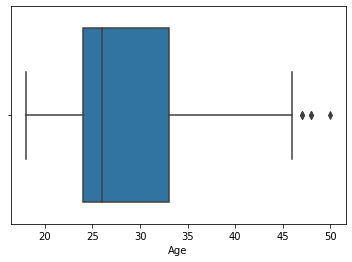

In [ ]:
sns.boxplot(x=df['Age']);

Most customers' income are range from 30000 to 60000, and customers with income around 50000 is the biggest group within groups of other income.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


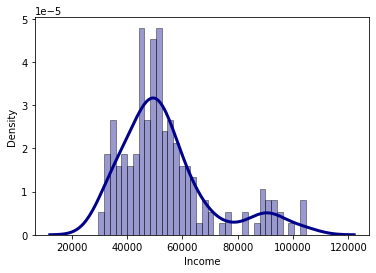

In [ ]:
import seaborn as sns

sns.distplot(df['Income'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3});

We can see a pretty balanced dataset. Around 105 male and 75 female.

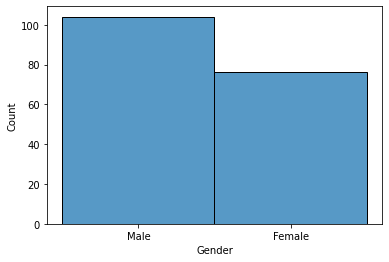

In [ ]:
sns.histplot(df['Gender']);

We can see a balanced dataset. Around 70 Single and 110 Partnered.

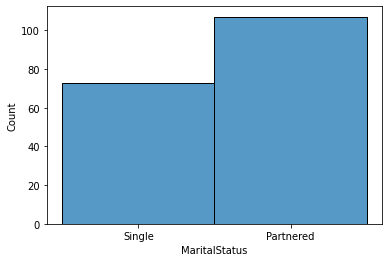

In [ ]:
sns.histplot(df['MaritalStatus']);

Scatterplot shows that as the miles the customer expects to walk/run each week goes up, the level of self-rated fitness also increase.

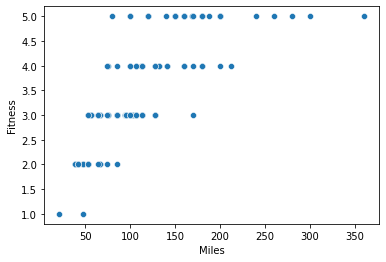

In [ ]:
sns.scatterplot(x=df['Miles'],y=df['Fitness']);

Scatterplot shows that as the miles the customer expects to walk/run each week goes up, the each week usage of customer also grow.

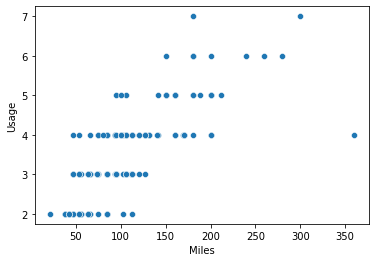

In [ ]:
sns.scatterplot(x=df['Miles'],y=df['Usage']);

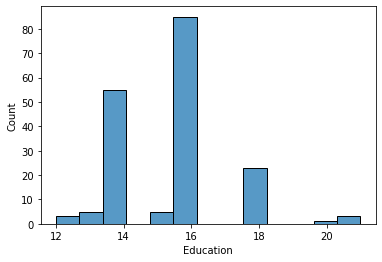

In [ ]:
sns.histplot(df['Education']);

As mentioned above, Miles and Fitness as well as Miles and Usage are both highly correlated, exact to be 0.785702 and 0.759130.

In [ ]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


There seems to be no missing values in the data. All columns are ints except for Product，Gender, and MaritalStatus，which are in object datatype.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Let's convert the Gender column to be dummies. We will also drop the first column since if we know it's 1 in one column, it's gotta be 0 in the other. We convert Gender to dummies since we need all data to be numerical to use a clustering method.

In [ ]:
pd.get_dummies(df['Gender'],drop_first=True)

,Male
0,1
1,1
2,0
3,1
4,1
...,...
175,1
176,1
177,1
178,1


In [ ]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

Keep Product and MaritalStatus columns in variables so we can add them back later when we evaluate the model


In [ ]:
product = df['Product']
Marrital = df['MaritalStatus']


We will drop both Product and MaritalStatus columns since them adds 
no value to the model. Also, since they are also correlated to the Income feature, we will add both columns back at the end when we analyze our results.

In [ ]:

df1 = df.drop('MaritalStatus',axis=1)


In [ ]:
df = df1.drop('Product',axis=1)

# Models & Analysis
## K Means Clustering vs. Hierarchical Clustering 

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Time to scale our data. We will use StandardScaler over MinMaxScaler because we want all of the columns to have the same mean and variance (mean to be 0 and variance 1). This will make sure that the model doesn't think one feature means more than the other just because of the range of values.

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_df = scaler.fit_transform(df)

In [ ]:
from sklearn.cluster import KMeans

Let's see what to use as our n_clusters.

In [ ]:
# this code block will record the inertia for all n_clusters between 1 and 20
# make random_state equal to 50 so we can evaulate and compare inertias more fairly
inertia = []
k = range(1,20)
for a in k:
    model = KMeans(a,random_state=50)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

In [ ]:
inertia

[1260.0,
 821.3493302357642,
 673.7364579773622,
 584.0067673258563,
 505.26626132636443,
 457.9061062674109,
 425.808361242694,
 400.39741457546455,
 385.109394392726,
 359.0424616176247,
 342.30842324959235,
 312.6064617432281,
 297.9856507083309,
 280.5081723118806,
 267.63710396039767,
 263.4569228394216,
 248.94179862870385,
 244.7523544567398,
 237.12017148189267]

In [ ]:
import numpy as np
np.diff(inertia)

array([-438.65066976, -147.61287226,  -89.72969065,  -78.740506  ,
        -47.36015506,  -32.09774502,  -25.41094667,  -15.28802018,
        -26.06693278,  -16.73403837,  -29.70196151,  -14.62081103,
        -17.4774784 ,  -12.87106835,   -4.18018112,  -14.51512421,
         -4.18944417,   -7.63218297])

In [ ]:
import matplotlib.pyplot as plt

The elbow method says that we should choose a value where the y-axis decreases much less than before as you increase x. After taking a look at the differences between inertias, and the plot below, 6 seems to be the number of clusters we should choose. Since K Means is an Unsupervised method and we have an Unsupervised Learning problem, this would be our form of measuring model performance.

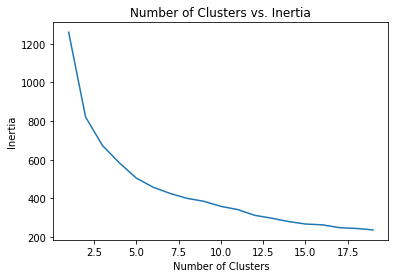

In [ ]:
# plot of the number of clusters on the x-axis and inertia on the y-axis using matplotlib
plt.plot(k,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs. Inertia');

Let's create and fit our model.

In [ ]:
model = KMeans(6)

In [ ]:
model.fit(scaled_df)

KMeans(n_clusters=6)

The following are the labels that the model found for each datapoint.

In [ ]:
model.labels_

array([1, 1, 4, 1, 1, 4, 4, 1, 5, 4, 1, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 1,
       4, 5, 1, 1, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 5, 1, 4, 1, 4,
       4, 4, 1, 4, 1, 4, 2, 4, 4, 5, 1, 1, 4, 4, 1, 3, 3, 5, 3, 2, 3, 3,
       1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 1, 1, 4, 1, 5, 1, 1, 1,
       1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 5,
       1, 1, 4, 4, 4, 2, 3, 3, 2, 2, 5, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 3, 2, 3, 3, 2, 2, 2, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2,
       0, 0, 0, 3, 5, 0, 2, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [ ]:
# create new column called "KMeans Label"
df['KMeans Label'] = model.labels_

In [ ]:
df.head()

,Age,Gender,Education,Usage,Fitness,Income,Miles,KMeans Label
0,18,1,14,3,4,29562,112,1
1,19,1,15,2,3,31836,75,1
2,19,0,14,4,3,30699,66,4
3,19,1,12,3,3,32973,85,1
4,20,1,13,4,2,35247,47,1


Bring back Product and MaritalStatus columns so we can see which product are grouped together, and customers' marriage status.

In [ ]:


df['Product'] = product 
df['MaritalStatus'] = Marrital 

In [ ]:
df.head()

,Age,Gender,Education,Usage,Fitness,Income,Miles,KMeans Label,Product,MaritalStatus
0,18,1,14,3,4,29562,112,1,TM195,Single
1,19,1,15,2,3,31836,75,1,TM195,Single
2,19,0,14,4,3,30699,66,4,TM195,Partnered
3,19,1,12,3,3,32973,85,1,TM195,Single
4,20,1,13,4,2,35247,47,1,TM195,Partnered


In [ ]:
# rearrange df so Product# is the first column
df = df[['Product', 'Age','Gender', 'Education','MaritalStatus','Usage',	'Fitness', 'Income','Miles','KMeans Label']]

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,KMeans Label
0,TM195,18,1,14,Single,3,4,29562,112,1
1,TM195,19,1,15,Single,2,3,31836,75,1
2,TM195,19,0,14,Partnered,4,3,30699,66,4
3,TM195,19,1,12,Single,3,3,32973,85,1
4,TM195,20,1,13,Partnered,4,2,35247,47,1


**Let**'s take a look at all of the points where the KMeans Label is 1. Gender is equal to 1, meaning everyone is Male. Age seems to be in the range of 20 to 30 for the most part. Annual Income looks to go from around 30000 to 50000. Most type of products used is TM195, and the usage miles seems to be around from 50 to 100.

In [ ]:
df[df['KMeans Label']==1]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,KMeans Label
0,TM195,18,1,14,Single,3,4,29562,112,1
1,TM195,19,1,15,Single,2,3,31836,75,1
3,TM195,19,1,12,Single,3,3,32973,85,1
4,TM195,20,1,13,Partnered,4,2,35247,47,1
7,TM195,21,1,13,Single,3,3,32973,85,1
10,TM195,22,1,14,Single,3,3,36384,85,1
14,TM195,23,1,16,Partnered,3,1,38658,47,1
15,TM195,23,1,16,Partnered,3,3,40932,75,1
17,TM195,23,1,16,Partnered,4,3,39795,94,1
20,TM195,23,1,14,Single,4,3,38658,113,1


Time to do Hierarchical Clustering.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

We will keep number of clusters to be 6 so we can compare the clusters of the two models on the same transformed dataset.

In [ ]:
hierarchical = AgglomerativeClustering(6)

In [ ]:
hierarchical.fit(scaled_df)

AgglomerativeClustering(n_clusters=6)

In [ ]:
hierarchical.labels_

array([1, 1, 3, 1, 1, 3, 3, 1, 0, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1,
       3, 0, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3,
       3, 2, 1, 3, 1, 3, 0, 3, 3, 1, 1, 5, 3, 3, 1, 2, 2, 1, 2, 5, 2, 2,
       1, 2, 5, 2, 5, 5, 1, 5, 5, 5, 2, 2, 5, 2, 1, 1, 3, 1, 0, 1, 1, 1,
       1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3,
       1, 1, 3, 3, 3, 5, 2, 2, 5, 5, 1, 2, 5, 2, 2, 2, 5, 5, 2, 5, 2, 5,
       2, 2, 5, 2, 2, 5, 5, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4])

In [ ]:
# create new column called "Hierarchical Label"
df['Hierarchical Label'] = hierarchical.labels_

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,KMeans Label,Hierarchical Label
0,TM195,18,1,14,Single,3,4,29562,112,1,1
1,TM195,19,1,15,Single,2,3,31836,75,1,1
2,TM195,19,0,14,Partnered,4,3,30699,66,4,3
3,TM195,19,1,12,Single,3,3,32973,85,1,1
4,TM195,20,1,13,Partnered,4,2,35247,47,1,1


It seems when the hierarchical label equals to 1, it represents when the kmeans label equals to 1 as well.

In [ ]:
df[df['Hierarchical Label']==1]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,KMeans Label,Hierarchical Label
0,TM195,18,1,14,Single,3,4,29562,112,1,1
1,TM195,19,1,15,Single,2,3,31836,75,1,1
3,TM195,19,1,12,Single,3,3,32973,85,1,1
4,TM195,20,1,13,Partnered,4,2,35247,47,1,1
7,TM195,21,1,13,Single,3,3,32973,85,1,1
10,TM195,22,1,14,Single,3,3,36384,85,1,1
14,TM195,23,1,16,Partnered,3,1,38658,47,1,1
15,TM195,23,1,16,Partnered,3,3,40932,75,1,1
17,TM195,23,1,16,Partnered,4,3,39795,94,1,1
20,TM195,23,1,14,Single,4,3,38658,113,1,1


In [ ]:
df[df['KMeans Label']==2]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,KMeans Label,Hierarchical Label
50,TM195,29,1,18,Partnered,3,3,68220,85,2,0
63,TM195,35,1,16,Partnered,4,3,48891,85,2,5
68,TM195,38,1,16,Partnered,3,3,46617,75,2,5
70,TM195,38,1,14,Single,2,3,52302,56,2,5
71,TM195,38,1,16,Partnered,3,3,56850,75,2,5
72,TM195,39,1,16,Partnered,4,4,59124,132,2,1
73,TM195,40,1,16,Partnered,3,3,61398,66,2,5
74,TM195,41,1,16,Partnered,4,3,54576,103,2,5
75,TM195,43,1,16,Partnered,3,3,53439,66,2,5
78,TM195,47,1,16,Partnered,4,3,56850,94,2,5


#Conclusion

As it is an unsupervised learning problem, a typical checking metrics is not needed to see performance because we can check the performance from the elbow method with the best number of clusters. There are 6 clusters using both k means and hierarchical clustering. Both models seemed to be clustering similarly based on comparing when hierarchical's label is equal to 1, k means seem to be 1 for the most part. In order to improve the performance in clustering, we can change linkage, affinity, and distance threshold of the model. Also, tunning hyperparameters would help to improve accuracy and other performance metrics.